### Loading packages

In [ ]:
# Package to process array and metrics
import numpy as np

# Package to process dataframe
import pandas as pd


# Package to plot the figures
import matplotlib.pyplot as plt
import seaborn as sns

# nice printing
from pprint import pprint 

# Enable logging
import warnings


# import nltk and spacy
import nltk
import spacy

# import English model
from spacy.lang.en import English
# stop word list
from spacy.lang.en.stop_words import STOP_WORDS
# import string
import string

# Classsification tasks, text specific
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report



In [ ]:
## Loading 

### Loading Data

In [ ]:
# from google.colab import files
from google.colab import drive 

#Upload the files on g-drive and below code is for mounting the drive
drive.mount('/content/drive')
# Read as object to avoid that pandas does any smart type conversion
# because we want to store the sample data in exactly the same format as the original data
df = pd.read_excel(r"/content/drive/My Drive/hotelSatisfaction_English.xlsx", dtype=object)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Undersatnding

In [ ]:
df.head()

,Comments,OverallSentiment
0,Rooms were clean.,positive
1,Excellent value for money,positive
2,Parking too small. No free wifi in rooms. No c...,negative
3,"Comfortable rooms, outstanding breakfast, nice...",positive
4,Quiet location right on the beach.,positive


In [ ]:
df.shape

(860, 2)

In [ ]:
df['OverallSentiment'].nunique()

2

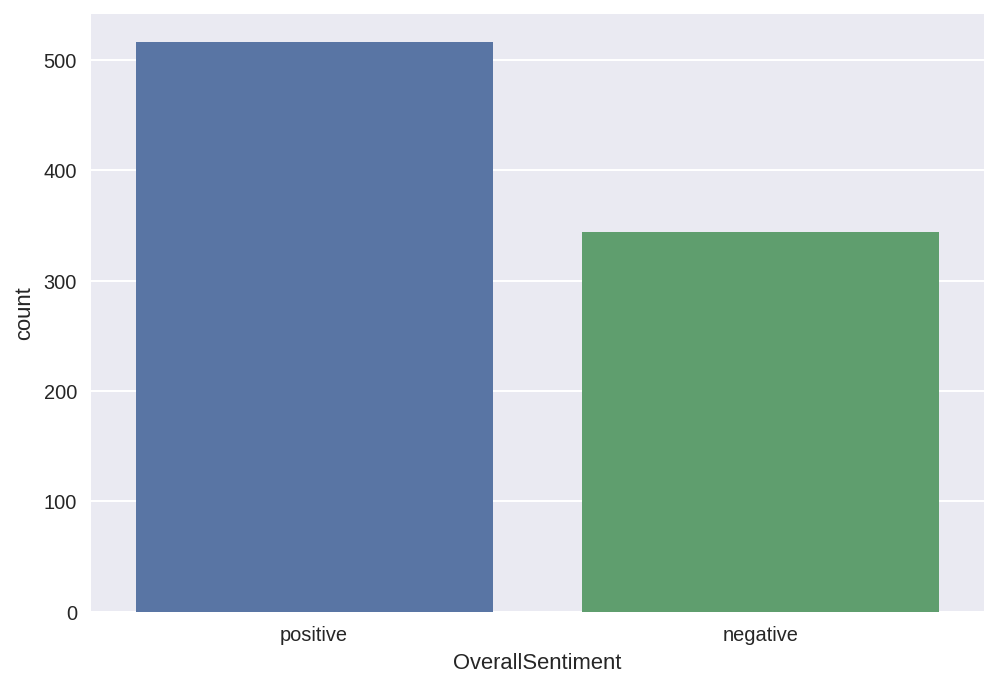

In [ ]:
fig, ax = plt.subplots()
_ = sns.countplot(x='OverallSentiment', data=df)
plt.show()

### Data Preparation
 - Tokenizer
     - Token count matix
     - TFIDF matrix

In [ ]:
# Creating a tokenizer function:
def tokenizer(sentence):
  # Creating our token object, which is used to create documents with linguistic annotations.
  mytokens = parser(sentence)
  # Lemmatizing each token and converting each token into lowercase
  mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "PRON-" else word.lower_ for word in mytokens ]
  # Removing stop words
  mytokens = [word for word in mytokens if word not in stop_words and word not in punctuation]
  # return preprocessed list of tokens
  return mytokens

In [ ]:
# Instantiate an object English
parser = English()
# List of stopwords
stop_words = STOP_WORDS
# List of punctuation marks we want to delete
punctuation = string.punctuation
# Convert a collection of text documents to a matrix of token counts
cnt_vector = CountVectorizer(tokenizer=tokenizer, ngram_range=(2,2))
# Convert a collection of raw documents to a matrix of TF-IDF features.
tfidf_vector = TfidfVectorizer(tokenizer=tokenizer, ngram_range=(2,2))

In [ ]:
# Independent and dependent features
X, y = df['Comments'], df['OverallSentiment']
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=121)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((645,), (645,), (215,), (215,))

### Modelling

In [ ]:
# Logistic Regression Classifier
LR = LogisticRegression()
# Create the pipeline
pipeline = Pipeline([("TV", tfidf_vector), ("LR", LR)]) 

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('TV',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(2, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer at 0x7fdd4a509950>,
                                 use_idf=True, vocabulary=None)),
                ('LR',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_int

In [ ]:
#Prediction
y_pred=pipeline.predict(X_test)

### Evaluation

In [ ]:

pipeline.score(y_test, y_pred)

0.8651162790697674

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 27,  59],
       [  2, 127]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.93      0.31      0.47        86
    positive       0.68      0.98      0.81       129

    accuracy                           0.72       215
   macro avg       0.81      0.65      0.64       215
weighted avg       0.78      0.72      0.67       215

